In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn.metrics.pairwise import cosine_similarity

# Word Embeddings

--> The following cells can be run if it is feasible to train the embeddings from scratch. Otherwise, skip ahead in the notebook to load the vectors.

In [ ]:
!pip install datasets

In [ ]:
from datasets import load_dataset
dataset_en = load_dataset("wikipedia", "20220301.en", split="train[:10000]", trust_remote_code=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/16.0k [00:00<?, ?B/s]

wikipedia.py:   0%|          | 0.00/36.7k [00:00<?, ?B/s]

train-00000-of-00041.parquet:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

train-00001-of-00041.parquet:   0%|          | 0.00/705M [00:00<?, ?B/s]

train-00002-of-00041.parquet:   0%|          | 0.00/558M [00:00<?, ?B/s]

train-00003-of-00041.parquet:   0%|          | 0.00/491M [00:00<?, ?B/s]

train-00004-of-00041.parquet:   0%|          | 0.00/431M [00:00<?, ?B/s]

train-00005-of-00041.parquet:   0%|          | 0.00/391M [00:00<?, ?B/s]

train-00006-of-00041.parquet:   0%|          | 0.00/366M [00:00<?, ?B/s]

train-00007-of-00041.parquet:   0%|          | 0.00/326M [00:00<?, ?B/s]

train-00008-of-00041.parquet:   0%|          | 0.00/329M [00:00<?, ?B/s]

train-00009-of-00041.parquet:   0%|          | 0.00/312M [00:00<?, ?B/s]

train-00010-of-00041.parquet:   0%|          | 0.00/267M [00:00<?, ?B/s]

train-00011-of-00041.parquet:   0%|          | 0.00/247M [00:00<?, ?B/s]

train-00012-of-00041.parquet:   0%|          | 0.00/229M [00:00<?, ?B/s]

train-00013-of-00041.parquet:   0%|          | 0.00/248M [00:00<?, ?B/s]

train-00014-of-00041.parquet:   0%|          | 0.00/222M [00:00<?, ?B/s]

train-00015-of-00041.parquet:   0%|          | 0.00/236M [00:00<?, ?B/s]

train-00016-of-00041.parquet:   0%|          | 0.00/215M [00:00<?, ?B/s]

train-00017-of-00041.parquet:   0%|          | 0.00/229M [00:00<?, ?B/s]

train-00018-of-00041.parquet:   0%|          | 0.00/241M [00:00<?, ?B/s]

train-00019-of-00041.parquet:   0%|          | 0.00/228M [00:00<?, ?B/s]

train-00020-of-00041.parquet:   0%|          | 0.00/214M [00:00<?, ?B/s]

train-00021-of-00041.parquet:   0%|          | 0.00/255M [00:00<?, ?B/s]

train-00022-of-00041.parquet:   0%|          | 0.00/226M [00:00<?, ?B/s]

train-00023-of-00041.parquet:   0%|          | 0.00/226M [00:00<?, ?B/s]

train-00024-of-00041.parquet:   0%|          | 0.00/192M [00:00<?, ?B/s]

train-00025-of-00041.parquet:   0%|          | 0.00/218M [00:00<?, ?B/s]

train-00026-of-00041.parquet:   0%|          | 0.00/212M [00:00<?, ?B/s]

train-00027-of-00041.parquet:   0%|          | 0.00/206M [00:00<?, ?B/s]

train-00028-of-00041.parquet:   0%|          | 0.00/199M [00:00<?, ?B/s]

train-00029-of-00041.parquet:   0%|          | 0.00/219M [00:00<?, ?B/s]

train-00030-of-00041.parquet:   0%|          | 0.00/214M [00:00<?, ?B/s]

train-00031-of-00041.parquet:   0%|          | 0.00/216M [00:00<?, ?B/s]

train-00032-of-00041.parquet:   0%|          | 0.00/200M [00:00<?, ?B/s]

train-00033-of-00041.parquet:   0%|          | 0.00/203M [00:00<?, ?B/s]

train-00034-of-00041.parquet:   0%|          | 0.00/201M [00:00<?, ?B/s]

train-00035-of-00041.parquet:   0%|          | 0.00/192M [00:00<?, ?B/s]

train-00036-of-00041.parquet:   0%|          | 0.00/199M [00:00<?, ?B/s]

train-00037-of-00041.parquet:   0%|          | 0.00/195M [00:00<?, ?B/s]

train-00038-of-00041.parquet:   0%|          | 0.00/203M [00:00<?, ?B/s]

train-00039-of-00041.parquet:   0%|          | 0.00/192M [00:00<?, ?B/s]

train-00040-of-00041.parquet:   0%|          | 0.00/185M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/6458670 [00:00<?, ? examples/s]

In [ ]:
dataset_hi = load_dataset("wikimedia/wikipedia", "20231101.hi", split="train[:10000]", trust_remote_code=True)

In [ ]:
!pip install fasttext

In [ ]:
all_hi_text = dataset_hi['text']
all_en_text = dataset_en['text']

In [ ]:
with open("wiki_hi_texts.txt", "w", encoding="utf-8") as f:
    for line in all_hi_text:
        f.write(line + "\n")
with open("wiki_en_texts.txt", "w", encoding="utf-8") as f:
    for line in all_en_text:
        f.write(line + "\n")

In [ ]:
import fasttext

In [ ]:
!wget 'https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz'

--2025-03-05 19:09:53--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.227.219.70, 13.227.219.59, 13.227.219.10, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.227.219.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4503593528 (4.2G) [application/octet-stream]
Saving to: ‘cc.en.300.bin.gz’

cc.en.300.bin.gz    100%[===================>]   4.19G   231MB/s    in 26s     

2025-03-05 19:10:19 (166 MB/s) - ‘cc.en.300.bin.gz’ saved [4503593528/4503593528]



In [ ]:
!wget 'https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.hi.300.bin.gz'

--2025-03-06 00:09:45--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.hi.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.238.176.115, 18.238.176.44, 18.238.176.19, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.238.176.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4371554972 (4.1G) [application/octet-stream]
Saving to: ‘cc.hi.300.bin.gz’

cc.hi.300.bin.gz    100%[===================>]   4.07G  81.8MB/s    in 50s     

2025-03-06 00:10:35 (83.8 MB/s) - ‘cc.hi.300.bin.gz’ saved [4371554972/4371554972]



In [ ]:
!wget 'https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.vec.gz'

--2025-03-06 00:13:31--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.238.176.115, 18.238.176.19, 18.238.176.126, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.238.176.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1325960915 (1.2G) [binary/octet-stream]
Saving to: ‘cc.en.300.vec.gz’

cc.en.300.vec.gz    100%[===================>]   1.23G  29.4MB/s    in 54s     

2025-03-06 00:14:25 (23.4 MB/s) - ‘cc.en.300.vec.gz’ saved [1325960915/1325960915]



In [ ]:
!gunzip cc.hi.300.bin.gz

In [ ]:
!gunzip cc.en.300.vec.gz

In [ ]:
ft_hi = fasttext.load_model('cc.hi.300.bin')

In [ ]:
from gensim.models import KeyedVectors
model_en = KeyedVectors.load_word2vec_format('cc.en.300.vec', limit=100000, binary=False)

In [ ]:
import pickle
word_vector_dict = {word: model_en[word] for word in model_en.index_to_key}
with open('en_dict.pkl', 'wb') as f:
    pickle.dump(word_vector_dict, f)

top_100k_words = ft_hi.get_words()[:100000]
word_vector_dict = {word: ft_hi.get_word_vector(word) for word in top_100k_words}

with open('hi_dict.pkl', 'wb') as f:
    pickle.dump(word_vector_dict, f)

In [ ]:
from gensim.models.fasttext import FastText
model_hi = FastText(vector_size=300, window=5, corpus_file="wiki_hi_texts.txt", epochs=5, max_final_vocab=100000)
model_hi.save("model_hi")

I was trying to train this but due to computational constraints I am using the pretrained bin files instead. But the above code shows the strategy I would use^

## Run the below cells to load vectors and MUSE dataset

In [2]:
import pickle
with open('/content/drive/MyDrive/sarvam-assgn/hi_dict.pkl', 'rb') as f:
    loaded_hi_dict = pickle.load(f)
with open('/content/drive/MyDrive/sarvam-assgn/en_dict.pkl', 'rb') as g:
    loaded_en_dict = pickle.load(g)

In [ ]:
print('Size of hindi vocab' , len (loaded_hi_dict)) #This dict already has top 10k words from Hindi vocab
print('Size of eng vocab' , len (loaded_en_dict))

Size of hindi vocab 100000
Size of eng vocab 100000


In [3]:
import io
from collections import defaultdict

def load_translations(fname,hindilist,englist):
    '''
        This function loads the bilingual translation data as a dictionary
    '''

    translations = defaultdict(list)

    with io.open(fname, 'r', newline='\n') as fin:
        for line in fin:
            english,hindi = line.strip().split('\t')
            translations[english].append(hindi)
            englist.append(english)
            hindilist.append(hindi)
    return translations

In [5]:
hindi_biling_list = []
eng_biling_list = []

eng_hi_biling = load_translations('/content/drive/MyDrive/sarvam-assgn/en-hi.0-5000.txt',hindi_biling_list,eng_biling_list)

In [6]:
biling_hi_words = set(eng_hi_biling.keys())
loaded_hi_words = set(loaded_hi_dict.keys())

In [ ]:
common_words = biling_hi_words & loaded_hi_words

In [ ]:
len(common_words) #these hindi words from the training set occur in our vocab of 100k words

3486

In [ ]:
eng_biling_list[435] # Random sanity check

'make'

In [ ]:
hindi_biling_list[435] # Random sanity check

'बनाओ'

In [7]:
hi_vocab = list(loaded_hi_dict.keys())
en_vocab = list(loaded_en_dict.keys())

In [8]:
all_possible_hindi_vectors = np.array(list(loaded_hi_dict.values()))
all_possible_english_vectors = np.array(list(loaded_en_dict.values()))

In [ ]:
all_possible_hindi_vectors.shape

(100000, 300)

In [9]:
eng_hi_biling['earth'] # Example to see how a word can have multiple translations

['पृथ्वी', 'धरती']

# Data preparation

In [30]:
yes_en=0
yes_hi=0
valid_pairs = 0
valid_en_muse_words = []
valid_hi_muse_words = []


for i in range(len(eng_biling_list)):
  if eng_biling_list[i] in en_vocab:
    if hindi_biling_list[i] in hi_vocab:
      valid_pairs+=1
      valid_en_muse_words.append(eng_biling_list[i])
      valid_hi_muse_words.append(hindi_biling_list[i])


In [31]:
print("In the entire MUSE training set, the no. of VALID pairs (i.e.  both words in the pair are in the vocabulary) is ",valid_pairs)

In the entire MUSE training set, the no. of VALID pairs (i.e.  both words in the pair are in the vocabulary) is  8130


Now we know that we have ~8k pairs of bilingual terms to use in our TRAINING set

# Preparing the test set

In [ ]:
hindi_biling_list_test = []
eng_biling_list_test = []

eng_hi_biling_test = load_translations('/content/drive/MyDrive/sarvam-assgn/en-hi-test.txt',hindi_biling_list_test,eng_biling_list_test)

In [ ]:
testable = []

for e,h in eng_hi_biling_test.items():
  if e in en_vocab:
    testable.append(e)

In [ ]:
print("Total pairs in test set, " , len(eng_hi_biling_test))
print("Total english words in test set FROM our vocab " , len(testable))

Total pairs in test set,  1500
Total english words in test set FROM our vocab  1188


In [ ]:
test_source_vecs = [loaded_en_dict[word] for word in testable]

In [ ]:
test_source_matrix = np.array(test_source_vecs).T

Now we perform the evaluation on the testable portion of the test set i.e. english words for which vectors exist in the vocab

In [ ]:
ground_truth = [eng_hi_biling_test[word] for word in testable]

# Automating the training and testing with functions

In [ ]:
def get_random_subset(numbers, samplesize, seed=0):
    rng = np.random.default_rng(seed)
    return rng.choice(numbers, samplesize, replace=False)

def findMapping(size_train):

  # This function finds the procrustes matrix W, based on the training size

  numbers = range(len(valid_en_muse_words))
  indices_to_use = get_random_subset(numbers,size_train)
  source_words = [valid_en_muse_words[index] for index in indices_to_use]
  target_words = [valid_hi_muse_words[index] for index in indices_to_use]
  source_vecs = [loaded_en_dict[word] for word in source_words]
  target_vecs = [loaded_hi_dict[word] for word in target_words]
  source_matrix = np.array(source_vecs).T
  target_matrix = np.array(target_vecs).T
  yxT = np.matmul(target_matrix,source_matrix.T)
  u,s,vt = np.linalg.svd(yxT, full_matrices=True, compute_uv=True)
  matrix_sol = np.matmul(u,vt)
  return matrix_sol


def findTranslations(predicted_matrix,k):

  # This function finds k neighbours after mapping each vector

  word_list = hi_vocab
  predicted_translations = []

  for predicted_vector in predicted_matrix:
    predicted_vector = predicted_vector.reshape(1, -1)
    similarities = cosine_similarity(predicted_vector, all_possible_hindi_vectors)
    top_indices = np.argsort(similarities[0])[::-1][:k]  # Top k words
    top_words = [(word_list[i], similarities[0][i]) for i in top_indices]
    predicted_translations.append(top_words)

  return predicted_translations


def calculateMetrics(predicted_translations,ground_truth,k):

  # This function reports metrics based on the test set

  N = len(predicted_translations)
  precision_scores = []
  top_accuracy_scores = []
  modified_precision = []
  for i in range(N):
    correct_set = ground_truth[i]
    scores = 0
    for candidate in predicted_translations[i]:
      if candidate[0] in correct_set:
        scores +=1
    precision_scores.append(scores/k)
    modified_precision.append(scores/min(k,len(correct_set)))
    top_accuracy_scores.append(scores!=0)

  return precision_scores,top_accuracy_scores,modified_precision

In [ ]:
def evaluateMapping(matrix_sol, k, metric='vanilla'):

  # This function runs the pipeline based on either vanilla or CSLS metrics

  test_prediction_matrix = np.matmul(matrix_sol,test_source_matrix).T

  if metric == "CSLS":
    predicted_translations = findTranslationsCSLS(test_prediction_matrix,k)
  else:
    predicted_translations = findTranslations(test_prediction_matrix,k)

  prec,acc,modified_precision = calculateMetrics(predicted_translations,ground_truth,k)

  print("Average precision for k=",k, np.mean(prec))
  print("Top k accuracy for k=",k, np.mean(acc))
  print("Modified precision@k for k=",k, np.mean(modified_precision))
  return np.mean(prec),np.mean(acc),np.mean(modified_precision)

# Testing the model

In [ ]:
results = []
for size in [5000,6000,7000,8000]:
  print("Size of training lexicon (no. of pairs)",size)
  learnt_map = findMapping(size)
  for k in [1,3,5,7,10]:
    prec,acc,modified_precision = evaluateMapping(learnt_map,k)
    results.append((prec,acc,modified_precision))

Size of training lexicon (no. of pairs) 5000
Average precision for k= 1 0.33754208754208753
Top k accuracy for k= 1 0.33754208754208753
Modified precision@k for k= 1 0.33754208754208753
Average precision for k= 3 0.18799102132435463
Top k accuracy for k= 3 0.5025252525252525
Modified precision@k for k= 3 0.42396184062850734
Average precision for k= 5 0.13215488215488216
Top k accuracy for k= 5 0.5723905723905723
Modified precision@k for k= 5 0.4899270482603816
Average precision for k= 7 0.1016113516113516
Top k accuracy for k= 7 0.6077441077441077
Modified precision@k for k= 7 0.5247053872053872
Average precision for k= 10 0.0765993265993266
Top k accuracy for k= 10 0.6439393939393939
Modified precision@k for k= 10 0.561489898989899
Size of training lexicon (no. of pairs) 6000
Average precision for k= 1 0.3425925925925926
Top k accuracy for k= 1 0.3425925925925926
Modified precision@k for k= 1 0.3425925925925926
Average precision for k= 3 0.19360269360269358
Top k accuracy for k= 3 0.5

In [ ]:
summary_stats = []
for p,a,m in results:
  summary_stats.append(np.mean(p))
  summary_stats.append(np.mean(a))
  summary_stats.append(np.mean(m))


In [ ]:
df_k = [item for item in [1,3,5,7,10] for _ in range(3)]*4
df_metrics =  ['Average Precision', 'Top k Accuracy', 'Modified precision@k']*20
df_sizes = [item for item in [5000,6000,7000,8000] for _ in range(15)]
df_vanilla_proc = pd.DataFrame({'train_size':df_sizes, 'metric':df_metrics, 'k':df_k, 'value':summary_stats})
df_vanilla_proc.to_csv('/content/drive/MyDrive/sarvam-assgn/df-vanilla.csv')

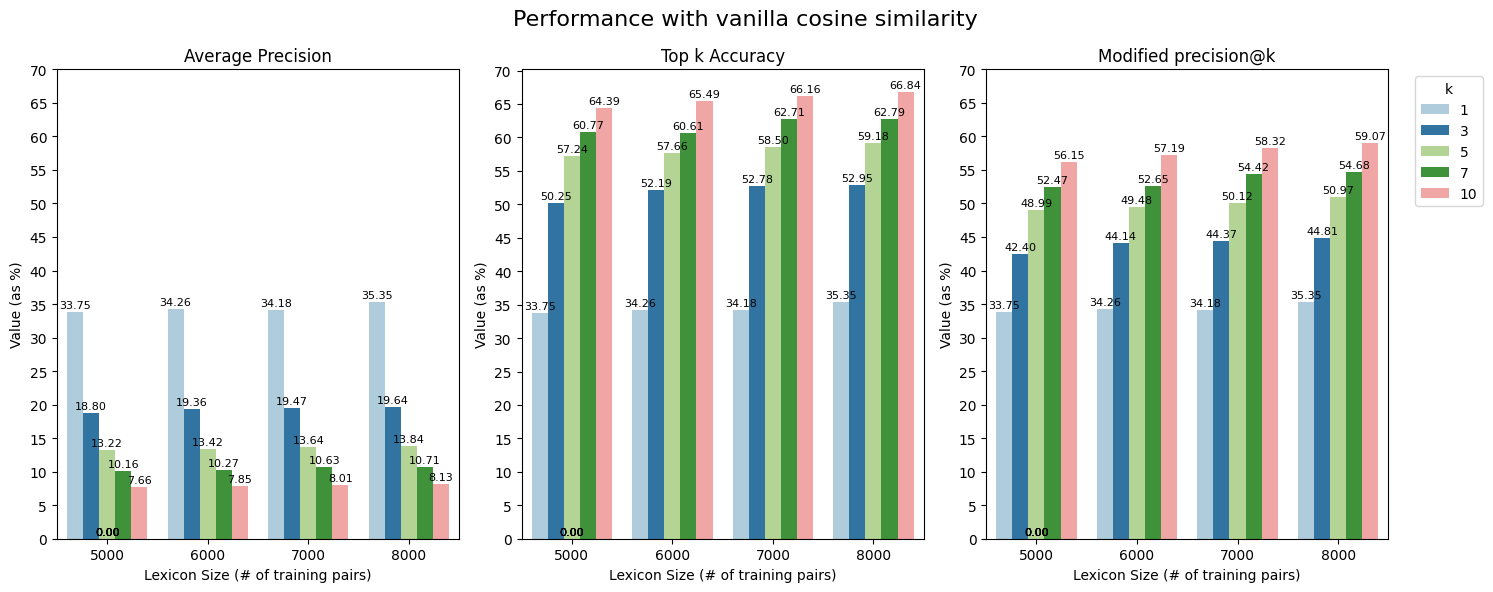

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/sarvam-assgn/df-vanilla.csv')

df['value'] = df['value']*100

palette = sns.color_palette("Paired", n_colors=5)


fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=False)
plt.suptitle("Performance with vanilla cosine similarity",fontsize=16)
metrics = df['metric'].unique()

for ax, metric in zip(axes, metrics):

    metric_data = df[df['metric'] == metric]


    sns.barplot(x='train_size', y='value', hue='k', data=metric_data, ax=ax, palette=palette)

    ax.set_yticks(range(0, int(df['value'].max()) + 6, 5))

    ax.set_title(metric)
    ax.set_xlabel('Lexicon Size (# of training pairs)')
    ax.set_ylabel('Value (as %)')
    ax.legend().set_visible(False)

    for p in ax.patches:
          ax.annotate(f'{p.get_height():.2f}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      fontsize=8, color='black',
                      xytext=(0, 5), textcoords='offset points')

ax.legend(title='k', loc='upper left', bbox_to_anchor=(1.05, 1))

plt.tight_layout()

plt.savefig('/content/drive/MyDrive/sarvam-assgn/plots_vanilla.pdf'  ,bbox_inches='tight')
plt.show()

# Analyzing cosine similarity scores

In [ ]:
similarity_scores = []
mapping_similarity = []
pair_no = len(valid_en_muse_words)
matrix_sol = findMapping(5000)

for i in range(pair_no):
  eword = loaded_en_dict[valid_en_muse_words[i]].reshape(1,-1)
  hword = loaded_hi_dict[valid_hi_muse_words[i]].reshape(1,-1)
  transformed_eword = np.matmul(matrix_sol,eword.T)
  similarity_scores.append(cosine_similarity(eword,hword)[0].item())
  mapping_similarity.append(cosine_similarity(transformed_eword.T,hword)[0].item())

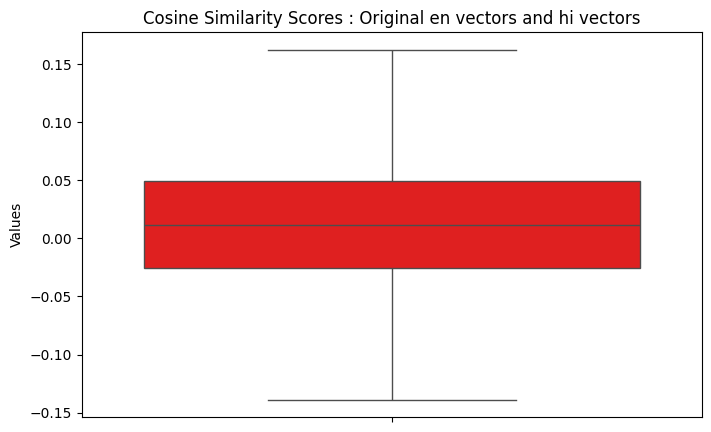

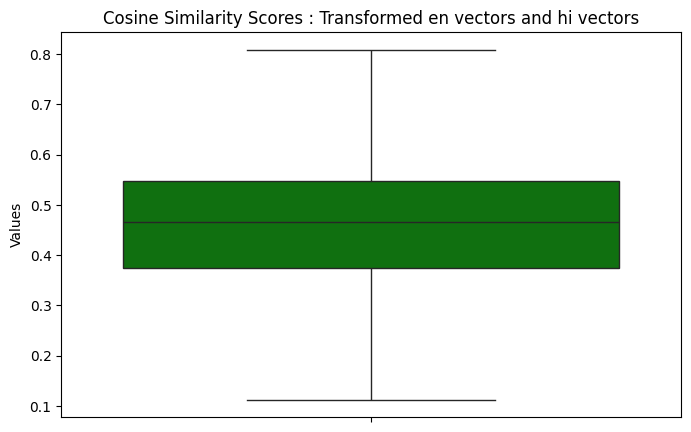

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=similarity_scores, showfliers=False,color='red')
plt.title("Cosine Similarity Scores : Original en vectors and hi vectors")
plt.ylabel("Values")
plt.show()
plt.figure(figsize=(8, 5))
sns.boxplot(data=mapping_similarity, showfliers=False,color='green')
plt.title("Cosine Similarity Scores : Transformed en vectors and hi vectors")
plt.ylabel("Values")
plt.show()

# Implementing CSLS

In [48]:
# Extra credit -- Implementing CSLS (Cross domain similarity local scaling)


def findCSLS(predicted_matrix, all_possible_hindi_vectors):

  # This function calculates the CSLS scores

    CSLS_K = 10
    sim_xy = cosine_similarity(predicted_matrix, all_possible_hindi_vectors)
    rT = np.sort(cosine_similarity(all_possible_hindi_vectors, predicted_matrix), axis=1)[:, -k:].mean(axis=1)
    rS = np.sort(sim_xy, axis=1)[:, -k:].mean(axis=1)
    csls_sim = 2 * sim_xy.T - rT[:, None] - rS[None, :]
    return csls_sim.T


def findTranslationsCSLS(predicted_matrix,k):

   # This function finds k neighbours after mapping each vector based on CSLS

  word_list = hi_vocab
  predicted_translations = []

  csls_matrix = findCSLS(predicted_matrix, all_possible_hindi_vectors)

  rows,cols = predicted_matrix.shape
  sorted_indices = np.argsort(-csls_matrix, axis=1)

  for i in range(rows):
    scores_for_the_row = csls_matrix[i]
    top_indices = sorted_indices[i, : k]
    top_words = [(word_list[i], scores_for_the_row[i]) for i in top_indices]
    predicted_translations.append(top_words)

  return predicted_translations

# Testing the model based on CSLS

In [ ]:
results2 = []
for size in [5000,6000,7000,8000]:
  print("Size of training lexicon (no. of pairs)",size)
  learnt_map = findMapping(size)
  for k in [1,3,5,7,10]:
    prec,acc,modified_precision = evaluateMapping(learnt_map,k,'CSLS')
    results2.append((prec,acc,modified_precision))

Size of training lexicon (no. of pairs) 5000
Average precision for k= 1 0.35269360269360267
Top k accuracy for k= 1 0.35269360269360267
Modified precision@k for k= 1 0.35269360269360267
Average precision for k= 3 0.2051066217732884
Top k accuracy for k= 3 0.5488215488215489
Modified precision@k for k= 3 0.4642255892255892
Average precision for k= 5 0.1432659932659933
Top k accuracy for k= 5 0.6119528619528619
Modified precision@k for k= 5 0.5309343434343434
Average precision for k= 7 0.1099086099086099
Top k accuracy for k= 7 0.6447811447811448
Modified precision@k for k= 7 0.5627384960718294
Average precision for k= 10 0.08215488215488215
Top k accuracy for k= 10 0.6792929292929293
Modified precision@k for k= 10 0.5991301907968575
Size of training lexicon (no. of pairs) 6000
Average precision for k= 1 0.3543771043771044
Top k accuracy for k= 1 0.3543771043771044
Modified precision@k for k= 1 0.3543771043771044
Average precision for k= 3 0.20959595959595959
Top k accuracy for k= 3 0.55

In [ ]:
summary_stats_2 = []
for (x1,x2,x3) in results2:
  summary_stats_2.append(x1)
  summary_stats_2.append(x2)
  summary_stats_2.append(x3)

In [ ]:
df_csls_proc = pd.DataFrame({'train_size':df_sizes, 'metric':df_metrics, 'k':df_k, 'value':summary_stats_2})
df_csls_proc.to_csv('/content/drive/MyDrive/sarvam-assgn/df-csls.csv')

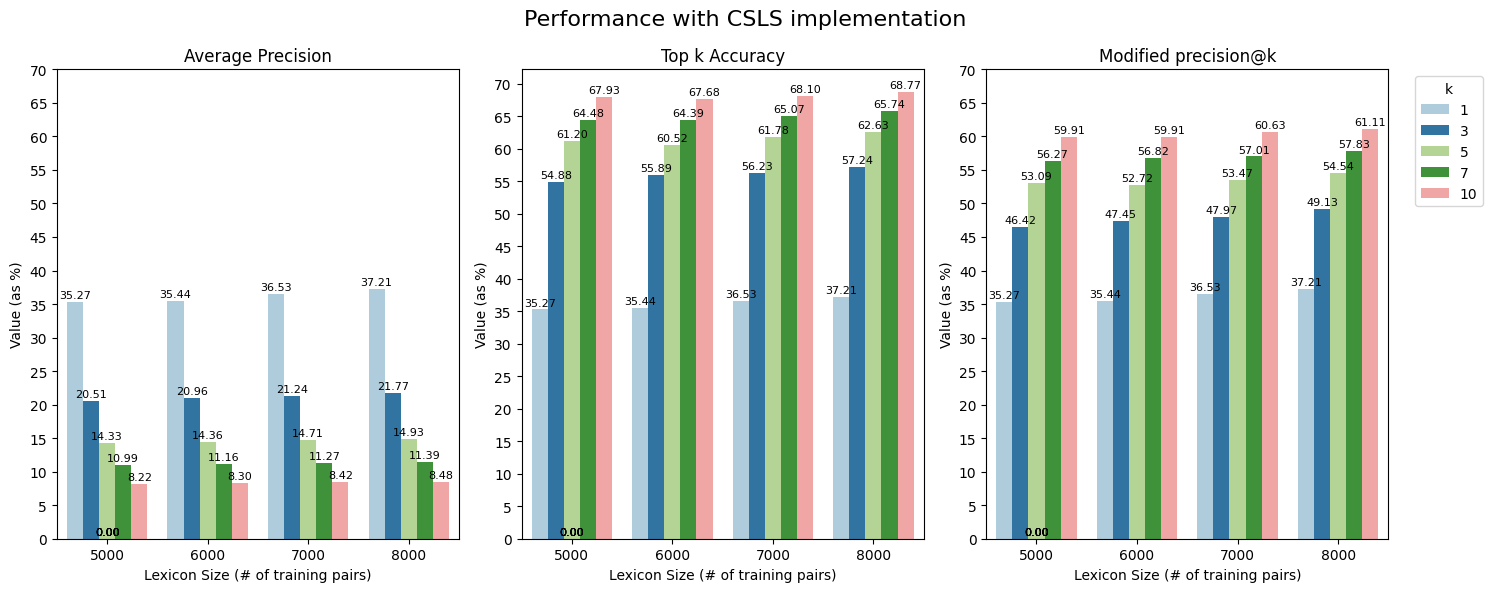

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/sarvam-assgn/df-csls.csv')

df['value'] = df['value']*100

palette = sns.color_palette("Paired", n_colors=5)


fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=False)
plt.suptitle("Performance with CSLS implementation",fontsize=16)
metrics = df['metric'].unique()

for ax, metric in zip(axes, metrics):

    metric_data = df[df['metric'] == metric]


    sns.barplot(x='train_size', y='value', hue='k', data=metric_data, ax=ax, palette=palette)

    ax.set_yticks(range(0, int(df['value'].max()) + 6, 5))

    ax.set_title(metric)
    ax.set_xlabel('Lexicon Size (# of training pairs)')
    ax.set_ylabel('Value (as %)')
    ax.legend().set_visible(False)

    for p in ax.patches:
          ax.annotate(f'{p.get_height():.2f}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      fontsize=8, color='black',
                      xytext=(0, 5), textcoords='offset points')

ax.legend(title='k', loc='upper left', bbox_to_anchor=(1.05, 1))

plt.tight_layout()

plt.savefig('/content/drive/MyDrive/sarvam-assgn/plots_csls.pdf',bbox_inches='tight')
plt.show()

# Unsupervised (GAN-like) training

In [12]:
top_50k_vecs_en = all_possible_english_vectors[:50000,:]
top_50k_vecs_hi = all_possible_hindi_vectors[:50000,:]

In [24]:
# OUTLINE of how I would train it based on the architecture

import torch
import torch.nn as nn
import torch.optim as optim


epsilon = 1e-8
smooth_Wx_label = 0.2
smooth_y_label = 0.8


class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Dropout(0.1),
            nn.Linear(input_dim, 2048),
            nn.LeakyReLU(),
            nn.Linear(2048, 2048),
            nn.LeakyReLU(),
            nn.Linear(2048, 1),
            nn.Sigmoid())

    def forward(self, x):
        return self.model(x)

class MappingMatrix(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MappingMatrix, self).__init__()
        self.W = nn.Linear(input_dim, output_dim, bias=False)

    def forward(self, x):
        return self.W(x)

    def orthogonal_update(self):
      with torch.no_grad():
        weight_matrix =  self.W.weight
        WT_W = weight_matrix @ weight_matrix.T
        new_W = 1.01 * weight_matrix- 0.01 * WT_W @ weight_matrix
        self.W.weight.copy_(new_W)



# Loss functions as defined by the paper on pg.3

def discriminator_loss(predictions_on_y, predictions_on_Wx):
    real_loss = torch.mean(torch.log(predictions_on_y + epsilon)* smooth_y_label)
    fake_loss = torch.mean(torch.log(1 - predictions_on_Wx + epsilon)* smooth_Wx_label)
    return -(real_loss+fake_loss)

def generator_loss(predictions_on_y, predictions_on_Wx):
    loss_Wx = torch.mean(torch.log(predictions_on_Wx + epsilon)* smooth_Wx_label)
    loss_y = torch.mean(torch.log(1 - predictions_on_y + epsilon)* smooth_y_label)

    return -(loss_Wx + loss_y)

batch_size = 32
learning_rate = 0.1
decay = 0.95
num_epochs = 10

input_dim,output_dim = 300,300
discriminator = Discriminator(input_dim)
mapping_matrix = MappingMatrix(input_dim, output_dim)

optimizer_D = optim.SGD(discriminator.parameters(), lr=learning_rate)
optimizer_W = optim.SGD(mapping_matrix.parameters(), lr=learning_rate)

#If the label is 1 that means it comes from the real data i.e. y; if label is 0 then the xi vectors which we are mapping

# Training
for epoch in range(num_epochs):
  for i in range(0, 50000, batch_size):
        x_batch = torch.tensor(top_50k_vecs_en[i:i+batch_size])
        y_batch = torch.tensor(top_50k_vecs_hi[i:i+batch_size])

        # Discriminator training and updation of weights
        optimizer_D.zero_grad()
        predictions_on_y = discriminator(y_batch)
        generated_data = mapping_matrix(x_batch)
        predictions_on_Wx = discriminator(generated_data.detach())
        loss_D = discriminator_loss(predictions_on_y, predictions_on_Wx)
        loss_D.backward()
        optimizer_D.step()
        optimizer_D.zero_grad()

        # Mapping Matrix training and updation of W alternated with the W given in eq(7) of our paper
        optimizer_W.zero_grad()
        predictions_on_y = discriminator(y_batch)
        predictions_on_Wx = discriminator(generated_data.detach())
        loss_W = generator_loss(predictions_on_y, predictions_on_Wx)
        loss_W.backward()
        optimizer_W.step()
        mapping_matrix.orthogonal_update()
        optimizer_W.zero_grad()

  learning_rate *= decay #we are decaying the lr for both components
  for param_group in optimizer_D.param_groups + optimizer_W.param_groups:
        param_group['lr'] = learning_rate

  print(f'Epoch [{epoch+1}/{num_epochs}], Discriminator Loss: {loss_D.item()}, Mapping W Loss: {loss_W.item()}')


Epoch [1/10], Discriminator Loss: 0.0036003966815769672, Mapping W Loss: 9.116671562194824
Epoch [2/10], Discriminator Loss: 0.0012126489309594035, Mapping W Loss: 11.520251274108887
Epoch [3/10], Discriminator Loss: 0.001070633064955473, Mapping W Loss: 12.089241027832031
Epoch [4/10], Discriminator Loss: 0.0026916987262666225, Mapping W Loss: 13.518758773803711
Epoch [5/10], Discriminator Loss: 0.0006810902268625796, Mapping W Loss: 13.180912971496582
Epoch [6/10], Discriminator Loss: 0.00044648657785728574, Mapping W Loss: 13.799078941345215
Epoch [7/10], Discriminator Loss: 0.0011646710336208344, Mapping W Loss: 13.302454948425293
Epoch [8/10], Discriminator Loss: 0.0009791422635316849, Mapping W Loss: 13.888772010803223
Epoch [9/10], Discriminator Loss: 0.000340984552167356, Mapping W Loss: 14.586130142211914
Epoch [10/10], Discriminator Loss: 0.0007714745006524026, Mapping W Loss: 14.264891624450684


(Only attemtped some toy training with few epochs above on CPU)